In [105]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Mythical code button"></form>''')

In [106]:
import scipy
import netCDF4 as nc
import numpy as np
import pickle
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
import cmocean as cm
import pipvis as vp
from importlib import reload
import pickle 
import sys
sys.path.append('./extraction_scripts')
import map_fxn as mf
reload(vp)


<module 'pipvis' from '/data/tjarniko/MEOPAR/analysis_tereza/notebooks/CLUSTER_PAPER/CLEAN/pipvis.py'>

##### Halocline

In [107]:
def clusters_basic(ax1,year,var,noclust,cl_this, colors, legend = True, markersize = 20, legfontsize = 12 ):
    
    import pickle
    import numpy as np
    import cmocean as cm
    import sys
    sys.path.append('./extraction_scripts')
    import map_fxn as mf
    from salishsea_tools import (
    viz_tools)
    
    bath = '/results/nowcast-sys/NEMO-forcing/grid/mesh_mask_SalishSea2.nc'
    grid = mf.import_bathy(bath)
    tpkl = f'./pkls/{var}_clustmat_{year}.pkl'
    cl = pickle.load(open(tpkl, 'rb'))

    viz_tools.set_aspect(ax1)   
    fmask = (grid.fmask[0,0,:,:])    
    mesh = ax1.pcolormesh(fmask, vmin=0, vmax=1, cmap = cm.cm.deep)

    ax1.set_ylim([0,898])
    ax1.set_xlim([0,398])

    stn_x, stn_y = mf.make_stns(10)
    d_stn_x, d_stn_y = mf.filter_stn_in_domain(stn_x,stn_y,fmask)

    d_stn_xar = np.array(d_stn_x)
    d_stn_yar = np.array(d_stn_y)

    edge = np.where((d_stn_xar<=10) | (d_stn_yar>=888))
    np.squeeze(edge)
    np.shape(edge)
    edgear = np.array(edge)
    edgear = edgear[0]

    d_stn_xar =np.delete(d_stn_xar,edge)
    d_stn_yar = np.delete(d_stn_yar,edge)

    for j in range(1,noclust+1):

        cluster = np.where(cl_this == j)
        cluster = np.squeeze(cluster)
        
        
        c1_x = np.take(d_stn_xar,cluster)
        c1_y = np.take(d_stn_yar,cluster)
        pts = ax1.scatter(c1_x,c1_y,s=markersize,c=colors[j], label=str(j), marker='o')
        ax1.set_xticklabels( () ) 
        ax1.set_yticklabels( () ) 
    
    tit = var + ', year: ' + year + ' \n n. clusters = '+ str(noclust)
    if legend:
        ax1.legend(bbox_to_anchor=(1.1, 1), fontsize = legfontsize)
    ax1.set_title(tit,fontsize = legfontsize + 2)

In [108]:
colors = ['white',
          'goldenrod',
          'forestgreen',
          'deepskyblue',
          'red',
          'midnightblue',
          'deepskyblue','gray','peru',
'olive','sandybrown','teal','pink','tan',
'yellow','thistle']

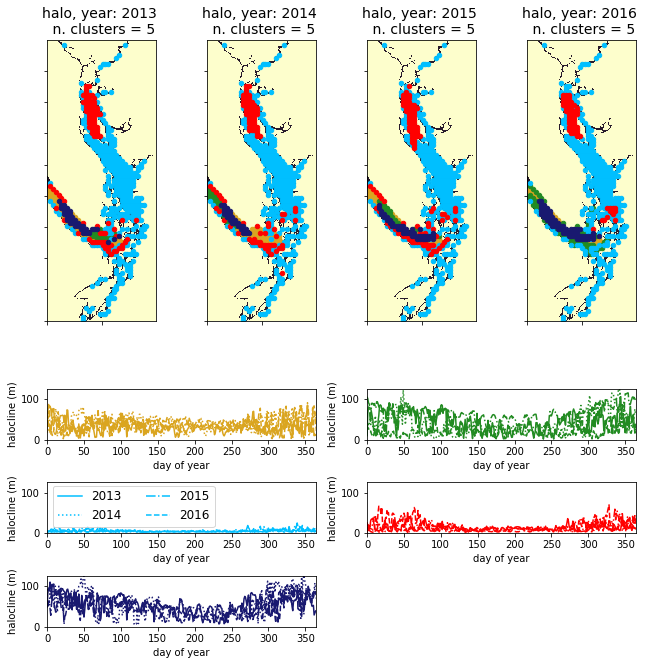

In [109]:
ylab = 'halocline (m)'
ylim = 125

sig_2013 = pickle.load(open('./pkls/halo_datamat_2013.pkl', 'rb'))
sig_2014 = pickle.load(open('./pkls/halo_datamat_2014.pkl', 'rb'))
sig_2015 = pickle.load(open('./pkls/halo_datamat_2015.pkl', 'rb'))
sig_2016 = pickle.load(open('./pkls/halo_datamat_2016.pkl', 'rb'))

cldes_2013_reass = pickle.load(open('./pkls/HALO_clno_5_2013_reass.pkl', 'rb'))
cldes_2014_reass = pickle.load(open('./pkls/HALO_clno_5_2014_reass.pkl', 'rb'))
cldes_2015_reass = pickle.load(open('./pkls/HALO_clno_5_2015_reass.pkl', 'rb'))
cldes_2016_reass = pickle.load(open('./pkls/HALO_clno_5_2016_reass.pkl', 'rb'))


linestyl = ['-',':','-.','--']
sigmats = [sig_2013,sig_2014,sig_2015,sig_2016]
clustmats = [cldes_2013_reass,cldes_2014_reass,cldes_2015_reass,cldes_2016_reass]
clustnos = [5,5,5,5]
nodays =  [365,365,365,366]
labs = ['2013','2014','2015','2016']



fact = 1.3
fig = plt.figure(figsize=(7*fact, 7.4*fact))

ax1 = plt.subplot2grid((7,4), (0,0), colspan=1, rowspan=4) 
vp.clusters_basic(ax1,'2013','halo',5,cldes_2013_reass, colors, legend = False)
ax1 = plt.subplot2grid((7,4), (0,1), colspan=1, rowspan=4) 
vp.clusters_basic(ax1,'2014','halo',5,cldes_2014_reass, colors, legend = False)
ax1 = plt.subplot2grid((7,4), (0,2), colspan=1, rowspan=4) 
vp.clusters_basic(ax1,'2015','halo',5,cldes_2015_reass, colors, legend = False)
ax1 = plt.subplot2grid((7,4), (0,3), colspan=1, rowspan=4) 
vp.clusters_basic(ax1,'2016','halo',5,cldes_2016_reass, colors, legend = False)

ax1 = plt.subplot2grid((7,4), (4,0), colspan=2, rowspan=1)
clustdes = [1,1,1,1]
for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = vp.cluster_patterns_mean(sigmats[i],tclmat,clustdes[i],nodays[i])
    ax1.plot(np.arange(0,nodays[i],1),np.squeeze(tmean), color = colors[1],\
                linestyle = linestyl[i], label = labs[i])
ax1.set_xlim([0,365])
ax1.set_ylim([0,ylim])
ax1.set_ylabel(ylab)
ax1.set_xlabel('day of year')


ax1 = plt.subplot2grid((7,4), (4,2), colspan=2, rowspan=1) 
clustdes = [2,2,2,2]
for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = vp.cluster_patterns_mean(sigmats[i],tclmat,clustdes[i],nodays[i])
    ax1.plot(np.arange(0,nodays[i],1),np.squeeze(tmean), color = colors[2],\
                linestyle = linestyl[i], label = labs[i])
ax1.set_xlim([0,365])
ax1.set_ylim([0,ylim])
ax1.set_ylabel(ylab)
ax1.set_xlabel('day of year')

ax1 = plt.subplot2grid((7,4), (5,0), colspan=2, rowspan=1) 
clustdes = [3,3,3,3]
for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = vp.cluster_patterns_mean(sigmats[i],tclmat,clustdes[i],nodays[i])
    ax1.plot(np.arange(0,nodays[i],1),np.squeeze(tmean), color = colors[3],\
                linestyle = linestyl[i], label = labs[i])
ax1.set_xlim([0,365])
ax1.set_ylim([0,ylim])
ax1.set_ylabel(ylab)
ax1.set_xlabel('day of year')
ax1.legend(ncol = 2, loc = 'best', fontsize = 12)

ax1 = plt.subplot2grid((7,4), (5,2), colspan=2, rowspan=1) 
clustdes = [4,4,4,4]
for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = vp.cluster_patterns_mean(sigmats[i],tclmat,clustdes[i],nodays[i])
    ax1.plot(np.arange(0,nodays[i],1),np.squeeze(tmean), color = colors[4],\
                linestyle = linestyl[i], label = labs[i])
ax1.set_xlim([0,365])
ax1.set_ylim([0,ylim])
ax1.set_ylabel(ylab)
ax1.set_xlabel('day of year')

ax1 = plt.subplot2grid((7,4), (6,0), colspan=2, rowspan=1) 
clustdes = [5,5,5,5]
for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = vp.cluster_patterns_mean(sigmats[i],tclmat,clustdes[i],nodays[i])
    ax1.plot(np.arange(0,nodays[i],1),np.squeeze(tmean), color = colors[5],\
                linestyle = linestyl[i], label = labs[i])
    
ax1.set_xlim([0,365])
ax1.set_ylim([0,ylim])
ax1.set_ylabel(ylab)
ax1.set_xlabel('day of year')
plt.tight_layout()


##### VED

In [110]:
sig_2013 = pickle.load(open('./pkls/ved_datamat_2013.pkl', 'rb'))
sig_2014 = pickle.load(open('./pkls/ved_datamat_2014.pkl', 'rb'))
sig_2015 = pickle.load(open('./pkls/ved_datamat_2015.pkl', 'rb'))
sig_2016 = pickle.load(open('./pkls/ved_datamat_2016.pkl', 'rb'))

cldes_2013_reass = pickle.load(open('./pkls/VED_clno_5_2013_reass.pkl', 'rb'))
cldes_2014_reass = pickle.load(open('./pkls/VED_clno_5_2014_reass.pkl', 'rb'))
cldes_2015_reass = pickle.load(open('./pkls/VED_clno_5_2015_reass.pkl', 'rb'))
cldes_2016_reass = pickle.load(open('./pkls/VED_clno_5_2016_reass.pkl', 'rb'))

ylab = 'm s2'
ylim = 0.5

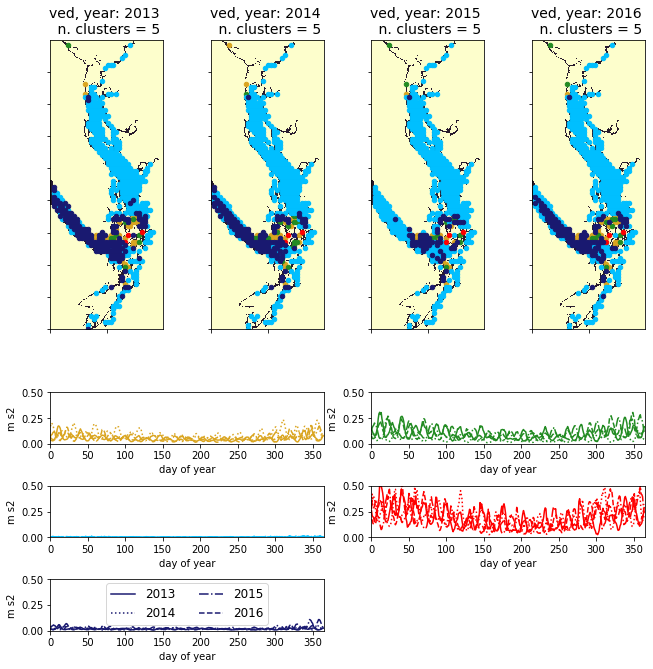

In [111]:
linestyl = ['-',':','-.','--']
sigmats = [sig_2013,sig_2014,sig_2015,sig_2016]
clustmats = [cldes_2013_reass,cldes_2014_reass,cldes_2015_reass,cldes_2016_reass]
clustnos = [5,5,5,5]
nodays =  [365,365,365,366]
labs = ['2013','2014','2015','2016']

fig = plt.figure(figsize=(7*fact, 7.4*fact))

ax1 = plt.subplot2grid((7,4), (0,0), colspan=1, rowspan=4) 
vp.clusters_basic(ax1,'2013','ved',5,cldes_2013_reass, colors, legend = False)
ax1 = plt.subplot2grid((7,4), (0,1), colspan=1, rowspan=4) 
vp.clusters_basic(ax1,'2014','ved',5,cldes_2014_reass, colors, legend = False)
ax1 = plt.subplot2grid((7,4), (0,2), colspan=1, rowspan=4) 
vp.clusters_basic(ax1,'2015','ved',5,cldes_2015_reass, colors, legend = False)
ax1 = plt.subplot2grid((7,4), (0,3), colspan=1, rowspan=4) 
vp.clusters_basic(ax1,'2016','ved',5,cldes_2016_reass, colors, legend = False)

ax1 = plt.subplot2grid((7,4), (4,0), colspan=2, rowspan=1)
clustdes = [1,1,1,1]
for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = vp.cluster_patterns_mean(sigmats[i],tclmat,clustdes[i],nodays[i])
    ax1.plot(np.arange(0,nodays[i],1),np.squeeze(tmean), color = colors[1],\
                linestyle = linestyl[i], label = labs[i])
ax1.set_xlim([0,365])
ax1.set_ylim([0,ylim])
ax1.set_ylabel(ylab)
ax1.set_xlabel('day of year')


ax1 = plt.subplot2grid((7,4), (4,2), colspan=2, rowspan=1) 
clustdes = [2,2,2,2]
for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = vp.cluster_patterns_mean(sigmats[i],tclmat,clustdes[i],nodays[i])
    ax1.plot(np.arange(0,nodays[i],1),np.squeeze(tmean), color = colors[2],\
                linestyle = linestyl[i], label = labs[i])
ax1.set_xlim([0,365])
ax1.set_ylim([0,ylim])
ax1.set_ylabel(ylab)
ax1.set_xlabel('day of year')

ax1 = plt.subplot2grid((7,4), (5,0), colspan=2, rowspan=1) 
clustdes = [3,3,3,3]
for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = vp.cluster_patterns_mean(sigmats[i],tclmat,clustdes[i],nodays[i])
    ax1.plot(np.arange(0,nodays[i],1),np.squeeze(tmean), color = colors[3],\
                linestyle = linestyl[i], label = labs[i])
ax1.set_xlim([0,365])
ax1.set_ylim([0,ylim])
ax1.set_ylabel(ylab)
ax1.set_xlabel('day of year')


ax1 = plt.subplot2grid((7,4), (5,2), colspan=2, rowspan=1) 
clustdes = [4,4,4,4]
for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = vp.cluster_patterns_mean(sigmats[i],tclmat,clustdes[i],nodays[i])
    ax1.plot(np.arange(0,nodays[i],1),np.squeeze(tmean), color = colors[4],\
                linestyle = linestyl[i], label = labs[i])
ax1.set_xlim([0,365])
ax1.set_ylim([0,ylim])
ax1.set_ylabel(ylab)
ax1.set_xlabel('day of year')

ax1 = plt.subplot2grid((7,4), (6,0), colspan=2, rowspan=1) 
clustdes = [5,5,5,5]
for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = vp.cluster_patterns_mean(sigmats[i],tclmat,clustdes[i],nodays[i])
    ax1.plot(np.arange(0,nodays[i],1),np.squeeze(tmean), color = colors[5],\
                linestyle = linestyl[i], label = labs[i])
ax1.legend(ncol = 2, loc = 'best', fontsize = 12)
    
ax1.set_xlim([0,365])
ax1.set_ylim([0,ylim])
ax1.set_ylabel(ylab)
ax1.set_xlabel('day of year')
plt.tight_layout()

##### WIND

In [112]:
sig_2013 = pickle.load(open('./pkls/wind_datamat_2013.pkl', 'rb'))
sig_2014 = pickle.load(open('./pkls/wind_datamat_2014.pkl', 'rb'))
sig_2015 = pickle.load(open('./pkls/wind_datamat_2015.pkl', 'rb'))
sig_2016 = pickle.load(open('./pkls/wind_datamat_2016.pkl', 'rb'))

cldes_2013_reass = pickle.load(open('./pkls/WIND_clno_5_2013_reass.pkl', 'rb'))
cldes_2014_reass = pickle.load(open('./pkls/WIND_clno_5_2014_reass.pkl', 'rb'))
cldes_2015_reass = pickle.load(open('./pkls/WIND_clno_5_2015_reass.pkl', 'rb'))
cldes_2016_reass = pickle.load(open('./pkls/WIND_clno_5_2016_reass.pkl', 'rb'))

ylab = 'wind m3/s3'
ylim = 2000

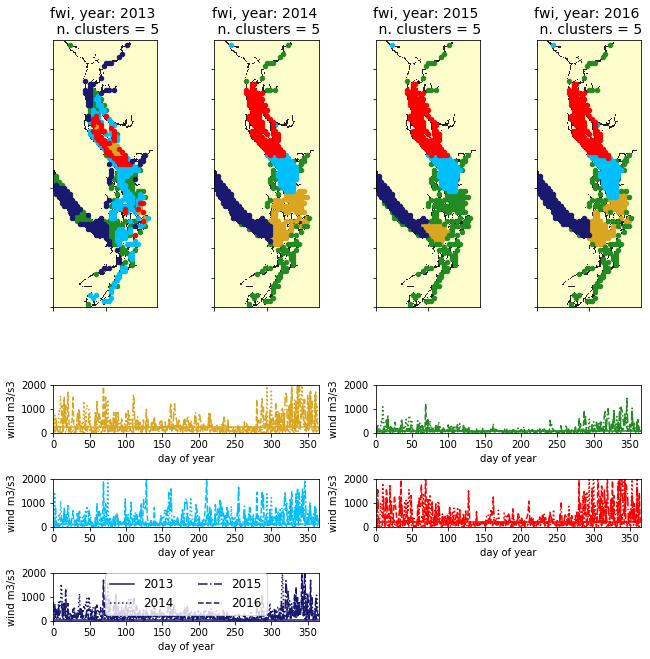

In [113]:
linestyl = ['-',':','-.','--']
sigmats = [sig_2013,sig_2014,sig_2015,sig_2016]
clustmats = [cldes_2013_reass,cldes_2014_reass,cldes_2015_reass,cldes_2016_reass]
clustnos = [5,5,5,5]
nodays =  [365,365,365,366]
labs = ['2013','2014','2015','2016']


fig = plt.figure(figsize=(7*fact, 7.4*fact))

ax1 = plt.subplot2grid((7,4), (0,0), colspan=1, rowspan=4) 
vp.clusters_basic(ax1,'2013','fwi',5,cldes_2013_reass, colors, legend = False)
ax1 = plt.subplot2grid((7,4), (0,1), colspan=1, rowspan=4) 
vp.clusters_basic(ax1,'2014','fwi',5,cldes_2014_reass, colors, legend = False)
ax1 = plt.subplot2grid((7,4), (0,2), colspan=1, rowspan=4) 
vp.clusters_basic(ax1,'2015','fwi',5,cldes_2015_reass, colors, legend = False)
ax1 = plt.subplot2grid((7,4), (0,3), colspan=1, rowspan=4) 
vp.clusters_basic(ax1,'2016','fwi',5,cldes_2016_reass, colors, legend = False)

ax1 = plt.subplot2grid((7,4), (4,0), colspan=2, rowspan=1)
clustdes = [1,1,1,1]
for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = vp.cluster_patterns_mean(sigmats[i],tclmat,clustdes[i],nodays[i])
    ax1.plot(np.arange(0,nodays[i],1),np.squeeze(tmean), color = colors[1],\
                linestyle = linestyl[i], label = labs[i])
ax1.set_xlim([0,365])
ax1.set_ylim([0,ylim])
ax1.set_ylabel(ylab)
ax1.set_xlabel('day of year')


ax1 = plt.subplot2grid((7,4), (4,2), colspan=2, rowspan=1) 
clustdes = [2,2,2,2]
for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = vp.cluster_patterns_mean(sigmats[i],tclmat,clustdes[i],nodays[i])
    ax1.plot(np.arange(0,nodays[i],1),np.squeeze(tmean), color = colors[2],\
                linestyle = linestyl[i], label = labs[i])
ax1.set_xlim([0,365])
ax1.set_ylim([0,ylim])
ax1.set_ylabel(ylab)
ax1.set_xlabel('day of year')

ax1 = plt.subplot2grid((7,4), (5,0), colspan=2, rowspan=1) 
clustdes = [3,3,3,3]
for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = vp.cluster_patterns_mean(sigmats[i],tclmat,clustdes[i],nodays[i])
    ax1.plot(np.arange(0,nodays[i],1),np.squeeze(tmean), color = colors[3],\
                linestyle = linestyl[i], label = labs[i])
ax1.set_xlim([0,365])
ax1.set_ylim([0,ylim])
ax1.set_ylabel(ylab)
ax1.set_xlabel('day of year')


ax1 = plt.subplot2grid((7,4), (5,2), colspan=2, rowspan=1) 
clustdes = [4,4,4,4]
for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = vp.cluster_patterns_mean(sigmats[i],tclmat,clustdes[i],nodays[i])
#     if i == 0:
#         print(tmean)
    ax1.plot(np.arange(0,nodays[i],1),np.squeeze(tmean), color = colors[4],\
                linestyle = linestyl[i], label = labs[i])
ax1.set_xlim([0,365])
ax1.set_ylim([0,ylim])
ax1.set_ylabel(ylab)
ax1.set_xlabel('day of year')

ax1 = plt.subplot2grid((7,4), (6,0), colspan=2, rowspan=1) 
clustdes = [5,5,5,5]
for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = vp.cluster_patterns_mean(sigmats[i],tclmat,clustdes[i],nodays[i])
    ax1.plot(np.arange(0,nodays[i],1),np.squeeze(tmean), color = colors[5],\
                linestyle = linestyl[i], label = labs[i])
ax1.legend(ncol = 2, loc = 'best', fontsize = 12)
    
ax1.set_xlim([0,365])
ax1.set_ylim([0,ylim])
ax1.set_ylabel(ylab)
ax1.set_xlabel('day of year')
plt.tight_layout()

##### FWI

In [114]:
sig_2013 = pickle.load(open('./pkls/fwi_datamat_2013.pkl', 'rb'))
sig_2014 = pickle.load(open('./pkls/fwi_datamat_2014.pkl', 'rb'))
sig_2015 = pickle.load(open('./pkls/fwi_datamat_2015.pkl', 'rb'))
sig_2016 = pickle.load(open('./pkls/fwi_datamat_2016.pkl', 'rb'))

cldes_2013_reass = pickle.load(open('./pkls/FWI_clno_5_2013_reass.pkl', 'rb'))
cldes_2014_reass = pickle.load(open('./pkls/FWI_clno_5_2014_reass.pkl', 'rb'))
cldes_2015_reass = pickle.load(open('./pkls/FWI_clno_5_2015_reass.pkl', 'rb'))
cldes_2016_reass = pickle.load(open('./pkls/FWI_clno_5_2016_reass.pkl', 'rb'))

ylab = 'FWI (g/kg m)'
ylim = 125

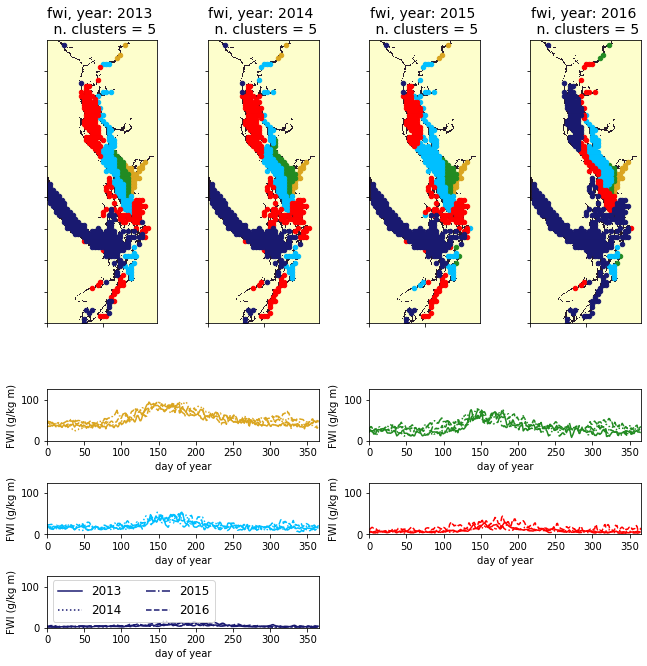

In [115]:
linestyl = ['-',':','-.','--']
sigmats = [sig_2013,sig_2014,sig_2015,sig_2016]
clustmats = [cldes_2013_reass,cldes_2014_reass,cldes_2015_reass,cldes_2016_reass]
clustnos = [5,5,5,5]
nodays =  [365,365,365,366]
labs = ['2013','2014','2015','2016']


fig = plt.figure(figsize=(7*fact, 7.4*fact))

ax1 = plt.subplot2grid((7,4), (0,0), colspan=1, rowspan=4) 
vp.clusters_basic(ax1,'2013','fwi',5,cldes_2013_reass, colors, legend = False)
ax1 = plt.subplot2grid((7,4), (0,1), colspan=1, rowspan=4) 
vp.clusters_basic(ax1,'2014','fwi',5,cldes_2014_reass, colors, legend = False)
ax1 = plt.subplot2grid((7,4), (0,2), colspan=1, rowspan=4) 
vp.clusters_basic(ax1,'2015','fwi',5,cldes_2015_reass, colors, legend = False)
ax1 = plt.subplot2grid((7,4), (0,3), colspan=1, rowspan=4) 
vp.clusters_basic(ax1,'2016','fwi',5,cldes_2016_reass, colors, legend = False)

ax1 = plt.subplot2grid((7,4), (4,0), colspan=2, rowspan=1)
clustdes = [1,1,1,1]
for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = vp.cluster_patterns_mean(sigmats[i],tclmat,clustdes[i],nodays[i])
    ax1.plot(np.arange(0,nodays[i],1),np.squeeze(tmean), color = colors[1],\
                linestyle = linestyl[i], label = labs[i])
ax1.set_xlim([0,365])
ax1.set_ylim([0,ylim])
ax1.set_ylabel(ylab)
ax1.set_xlabel('day of year')


ax1 = plt.subplot2grid((7,4), (4,2), colspan=2, rowspan=1) 
clustdes = [2,2,2,2]
for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = vp.cluster_patterns_mean(sigmats[i],tclmat,clustdes[i],nodays[i])
    ax1.plot(np.arange(0,nodays[i],1),np.squeeze(tmean), color = colors[2],\
                linestyle = linestyl[i], label = labs[i])
ax1.set_xlim([0,365])
ax1.set_ylim([0,ylim])
ax1.set_ylabel(ylab)
ax1.set_xlabel('day of year')

ax1 = plt.subplot2grid((7,4), (5,0), colspan=2, rowspan=1) 
clustdes = [3,3,3,3]
for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = vp.cluster_patterns_mean(sigmats[i],tclmat,clustdes[i],nodays[i])
    ax1.plot(np.arange(0,nodays[i],1),np.squeeze(tmean), color = colors[3],\
                linestyle = linestyl[i], label = labs[i])
ax1.set_xlim([0,365])
ax1.set_ylim([0,ylim])
ax1.set_ylabel(ylab)
ax1.set_xlabel('day of year')


ax1 = plt.subplot2grid((7,4), (5,2), colspan=2, rowspan=1) 
clustdes = [4,4,4,4]
for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = vp.cluster_patterns_mean(sigmats[i],tclmat,clustdes[i],nodays[i])
    ax1.plot(np.arange(0,nodays[i],1),np.squeeze(tmean), color = colors[4],\
                linestyle = linestyl[i], label = labs[i])
ax1.set_xlim([0,365])
ax1.set_ylim([0,ylim])
ax1.set_ylabel(ylab)
ax1.set_xlabel('day of year')

ax1 = plt.subplot2grid((7,4), (6,0), colspan=2, rowspan=1) 
clustdes = [5,5,5,5]
for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = vp.cluster_patterns_mean(sigmats[i],tclmat,clustdes[i],nodays[i])
    ax1.plot(np.arange(0,nodays[i],1),np.squeeze(tmean), color = colors[5],\
                linestyle = linestyl[i], label = labs[i])
ax1.legend(ncol = 2, loc = 'best', fontsize = 12)
    
ax1.set_xlim([0,365])
ax1.set_ylim([0,ylim])
ax1.set_ylabel(ylab)
ax1.set_xlabel('day of year')
plt.tight_layout()

##### BIO

In [116]:
def cluster_patterns_mean_BIO(orig_data,cluster_des,cluster_no,noday):
    import numpy as np
    
    '''For a given data matrix (S stations X 365 daily signals), list of clusters designation (S stations), 
    and specific cluster, return an C_S x 365 matrix of the C_S annual signals in that cluster
    for the C_S stations in the cluster'''
    #which stations are in the cluster we are looking for?
    where_cluster = np.where(cluster_des == cluster_no)
    where_cluster = np.squeeze(where_cluster)
    #print(where_cluster.shape)
    #print(where_cluster.size)

    
    no_stns_in_cluster = where_cluster.size
    if no_stns_in_cluster == 1:
        this_stn = np.squeeze(where_cluster)
        where_cluster = this_stn
        signalmat = orig_data[this_stn,:]
        mean_signal = signalmat
    else:    
    
        signalmat = np.zeros([no_stns_in_cluster,noday*3])

        for stn in range(0,no_stns_in_cluster):

            this_stn = where_cluster[stn]
            signalmat[stn,:] = orig_data[this_stn,:]
        mean_signal = np.nanmean(signalmat, axis = 0)
    return mean_signal

In [117]:
sig_2013 = pickle.load(open('./pkls/bio_datamat_2013.pkl', 'rb'))
sig_2014 = pickle.load(open('./pkls/bio_datamat_2014.pkl', 'rb'))
sig_2015 = pickle.load(open('./pkls/bio_datamat_2015.pkl', 'rb'))
sig_2016 = pickle.load(open('./pkls/bio_datamat_2016.pkl', 'rb'))

cldes_2013_reass = pickle.load(open('./pkls/BIO_clno_5_2013_reass.pkl', 'rb'))
cldes_2014_reass = pickle.load(open('./pkls/BIO_clno_5_2014_reass.pkl', 'rb'))
cldes_2015_reass = pickle.load(open('./pkls/BIO_clno_5_2015_reass.pkl', 'rb'))
cldes_2016_reass = pickle.load(open('./pkls/BIO_clno_5_2016_reass.pkl', 'rb'))

ylab = '(mmol N/m2)'
ylim = 125

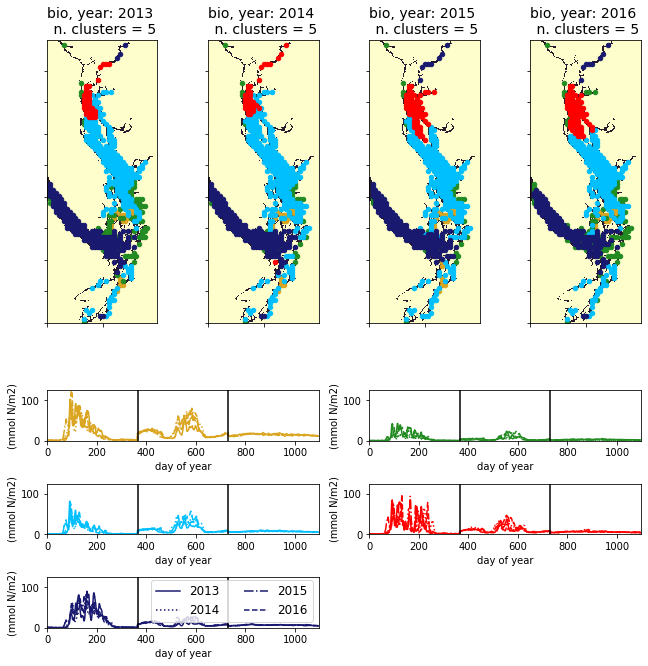

In [118]:
linestyl = ['-',':','-.','--']
sigmats = [sig_2013,sig_2014,sig_2015,sig_2016]
clustmats = [cldes_2013_reass,cldes_2014_reass,cldes_2015_reass,cldes_2016_reass]
clustnos = [5,5,5,5]
nodays =  [365,365,365,366]
labs = ['2013','2014','2015','2016']


fig = plt.figure(figsize=(7*fact, 7.4*fact))

ax1 = plt.subplot2grid((7,4), (0,0), colspan=1, rowspan=4) 
vp.clusters_basic(ax1,'2013','bio',5,cldes_2013_reass, colors, legend = False)
ax1 = plt.subplot2grid((7,4), (0,1), colspan=1, rowspan=4) 
vp.clusters_basic(ax1,'2014','bio',5,cldes_2014_reass, colors, legend = False)
ax1 = plt.subplot2grid((7,4), (0,2), colspan=1, rowspan=4) 
vp.clusters_basic(ax1,'2015','bio',5,cldes_2015_reass, colors, legend = False)
ax1 = plt.subplot2grid((7,4), (0,3), colspan=1, rowspan=4) 
vp.clusters_basic(ax1,'2016','bio',5,cldes_2016_reass, colors, legend = False)

ax1 = plt.subplot2grid((7,4), (4,0), colspan=2, rowspan=1)
clustdes = [1,1,1,1]
for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = cluster_patterns_mean_BIO(sigmats[i],tclmat,clustdes[i],nodays[i])
    ax1.plot(np.arange(0,nodays[i]*3,1),np.squeeze(tmean), color = colors[1],\
                linestyle = linestyl[i], label = labs[i])
ax1.set_xlim([0,365*3])
ax1.set_ylim([0,ylim])
ax1.set_ylabel(ylab)
ax1.axvline(x=365,color = 'k'); ax1.axvline(x=365*2,color = 'k')
ax1.set_xlabel('day of year')


ax1 = plt.subplot2grid((7,4), (4,2), colspan=2, rowspan=1) 
clustdes = [2,2,2,2]
for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = cluster_patterns_mean_BIO(sigmats[i],tclmat,clustdes[i],nodays[i])
    ax1.plot(np.arange(0,nodays[i]*3,1),np.squeeze(tmean), color = colors[2],\
                linestyle = linestyl[i], label = labs[i])
ax1.set_xlim([0,365*3])
ax1.set_ylim([0,ylim])
ax1.set_ylabel(ylab)
ax1.axvline(x=365,color = 'k'); ax1.axvline(x=365*2,color = 'k')
ax1.set_xlabel('day of year')

ax1 = plt.subplot2grid((7,4), (5,0), colspan=2, rowspan=1) 
clustdes = [3,3,3,3]
for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = cluster_patterns_mean_BIO(sigmats[i],tclmat,clustdes[i],nodays[i])
    ax1.plot(np.arange(0,nodays[i]*3,1),np.squeeze(tmean), color = colors[3],\
                linestyle = linestyl[i], label = labs[i])
ax1.set_xlim([0,365*3])
ax1.set_ylim([0,ylim])
ax1.set_ylabel(ylab)
ax1.axvline(x=365,color = 'k'); ax1.axvline(x=365*2,color = 'k')
ax1.set_xlabel('day of year')


ax1 = plt.subplot2grid((7,4), (5,2), colspan=2, rowspan=1) 
clustdes = [4,4,4,4]
for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = cluster_patterns_mean_BIO(sigmats[i],tclmat,clustdes[i],nodays[i])
    ax1.plot(np.arange(0,nodays[i]*3,1),np.squeeze(tmean), color = colors[4],\
                linestyle = linestyl[i], label = labs[i])
ax1.set_xlim([0,365*3])
ax1.set_ylim([0,ylim])
ax1.set_ylabel(ylab)
ax1.axvline(x=365,color = 'k'); ax1.axvline(x=365*2,color = 'k')
ax1.set_xlabel('day of year')

ax1 = plt.subplot2grid((7,4), (6,0), colspan=2, rowspan=1) 
clustdes = [5,5,5,5]
for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = cluster_patterns_mean_BIO(sigmats[i],tclmat,clustdes[i],nodays[i])
    ax1.plot(np.arange(0,nodays[i]*3,1),np.squeeze(tmean), color = colors[5],\
                linestyle = linestyl[i], label = labs[i])
ax1.legend(ncol = 2, loc = 'best', fontsize = 12)
    
ax1.set_xlim([0,365*3])
ax1.set_ylim([0,ylim])
ax1.set_ylabel(ylab)
ax1.axvline(x=365,color = 'k'); ax1.axvline(x=365*2,color = 'k')
ax1.set_xlabel('day of year')
plt.tight_layout()